# Program 4.05: Proportion of cells in each state averages, over several realizations

## Preamble

In [ ]:
using NBInclude

In [ ]:
@nbinclude("preamble/packages.ipynb");

In [ ]:
@nbinclude("preamble/model.ipynb");

In [ ]:
@nbinclude("preamble/functions.ipynb");

## Initialization

In [ ]:
parameters = define_par();
dt = 0.002;
save_each = round(Int64, 0.25 / dt);

Random.seed!(2345)
n_cells = 300;

In [ ]:
ite = 15
tf = 30;

## Formation of the aggregate

In [ ]:
com = initialize_growth(parameters; dt=dt);
grow_size!(com, save_each, n_cells)
m0 = length(com);
println(formed_correctly(com))

In [ ]:
growncom = deepcopy(com);

## Linear differentiation kinetics

In [ ]:
com_aux = deepcopy(growncom)
com_aux.k = 0
prot = false;

### Loop

In [ ]:
Random.seed!(1234)
seeds = rand(1:2000, ite)
props_linear = Dict();

In [ ]:
for i in 1:ite
	seed = seeds[i]
	print("Seed $i/$ite = $seed ...")
	Random.seed!(seed)

	com = deepcopy(com_aux)
	initialize_diff!(com)
    global m1 = length(com)
    
	differentiate!(com, save_each, tf; prot=prot)
    println(formed_correctly(com))
	global m2 = length(com)

	# plot_aggregate(com, color_map, m1, m2)
	props_linear[i] = get_props(com)
end

### Plot comparison

In [ ]:
dimensionalize_com!(com)

In [ ]:
avgprop_linear = avg_props_new(com, props_linear, ite);
stdprop_linear = std_props(com, props_linear, ite);

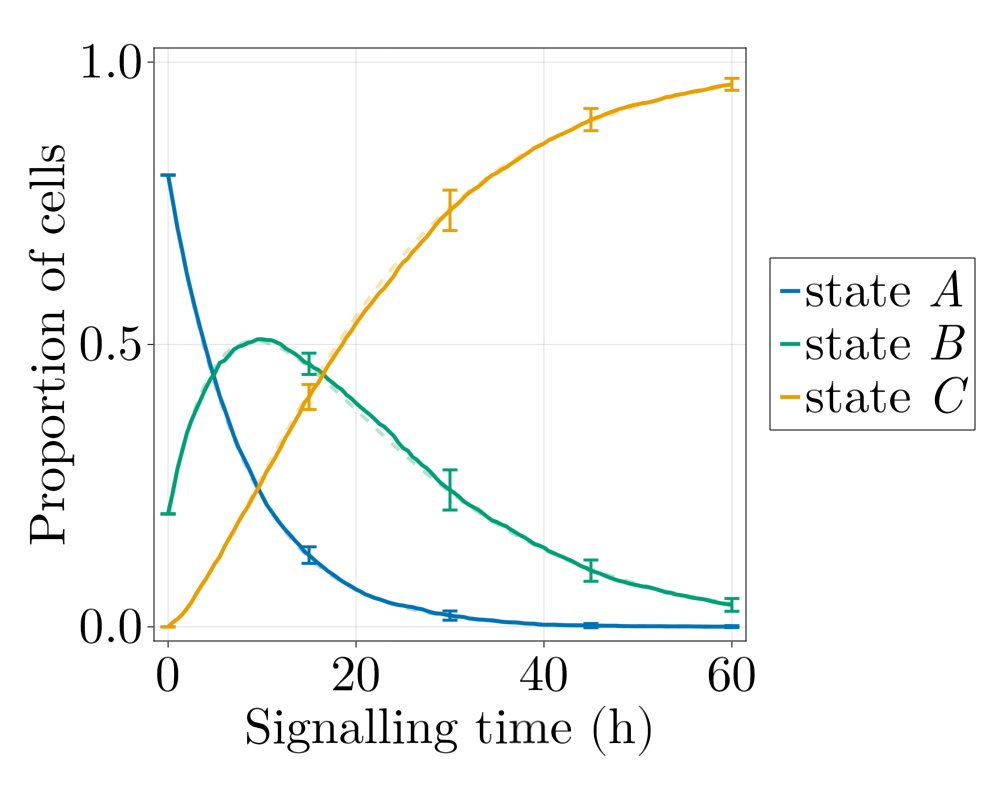

GLMakie.Screen(...)

In [24]:
plot_proportions_vs_analytical_std(com, color_map, m1, m2, avgprop_linear, std = stdprop_linear)

## Nonlinear differentiation kinetics: mean field model

In [ ]:
com_aux = deepcopy(growncom)
com_aux.k = parameters[:k]
com_aux.range = 100;
prot = false;

### Loop

In [ ]:
Random.seed!(1234)
seeds = rand(1:2000, ite)
props_meanfield = Dict();

In [ ]:
for i in 1:ite
	seed = seeds[i]
	print("Seed $i/$ite = $seed ...")
	Random.seed!(seed)

	com = deepcopy(com_aux)
	initialize_diff!(com)
    global m1 = length(com)
    
	differentiate!(com, save_each, tf; prot=prot)
    println(formed_correctly(com))
	global m2 = length(com)
    
	# plot_aggregate(com, color_map, m1, m2)
	props_meanfield[i] = get_props(com)
end

### Plot comparison

In [ ]:
dimensionalize_com!(com)

In [ ]:
avgprop_meanfield = avg_props_new(com, props_meanfield, ite);
stdprop_meanfield = std_props(com, props_meanfield, ite);

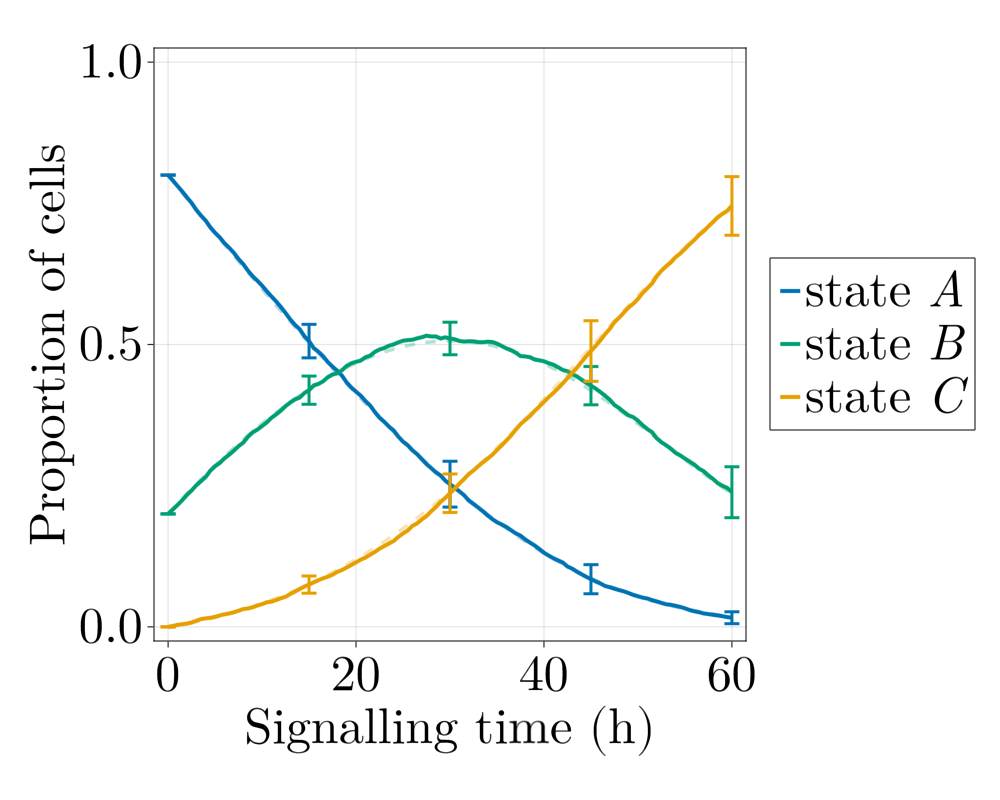

GLMakie.Screen(...)

In [30]:
plot_proportions_vs_meanfield_std(com, color_map, m1, m2, 
    avgprop_meanfield, std=stdprop_meanfield, k=parameters[:k])

## Nonlinear differentiation kinetics: cell-cell signalling (protrusions off)

In [ ]:
com_aux = deepcopy(growncom)
com_aux.k = parameters[:k];
com_aux.range = parameters[:range]
prot = false;

### Loop

In [ ]:
Random.seed!(1234)
seeds = rand(1:2000, ite)
props_cellcell = Dict();

In [ ]:
for i in 1:ite
	seed = seeds[i]
	print("Seed $i/$ite = $seed ...")
	Random.seed!(seed)

	com = deepcopy(com_aux)
	initialize_diff!(com)
    com.k = ks[i]
    global m1 = length(com)
    
	differentiate!(com, save_each, tf; prot=prot)
    println(formed_correctly(com))
	global m2 = length(com)
    
	# plot_aggregate(com, color_map, m1, m2)
	props_cellcell[i] = get_props(com)
end


### Plot comparison

In [ ]:
dimensionalize_com!(com)

In [ ]:
avgprop_cellcell = avg_props_new(com, props_cellcell, ite);
stdprop_cellcell = std_props(com, props_cellcell, ite);

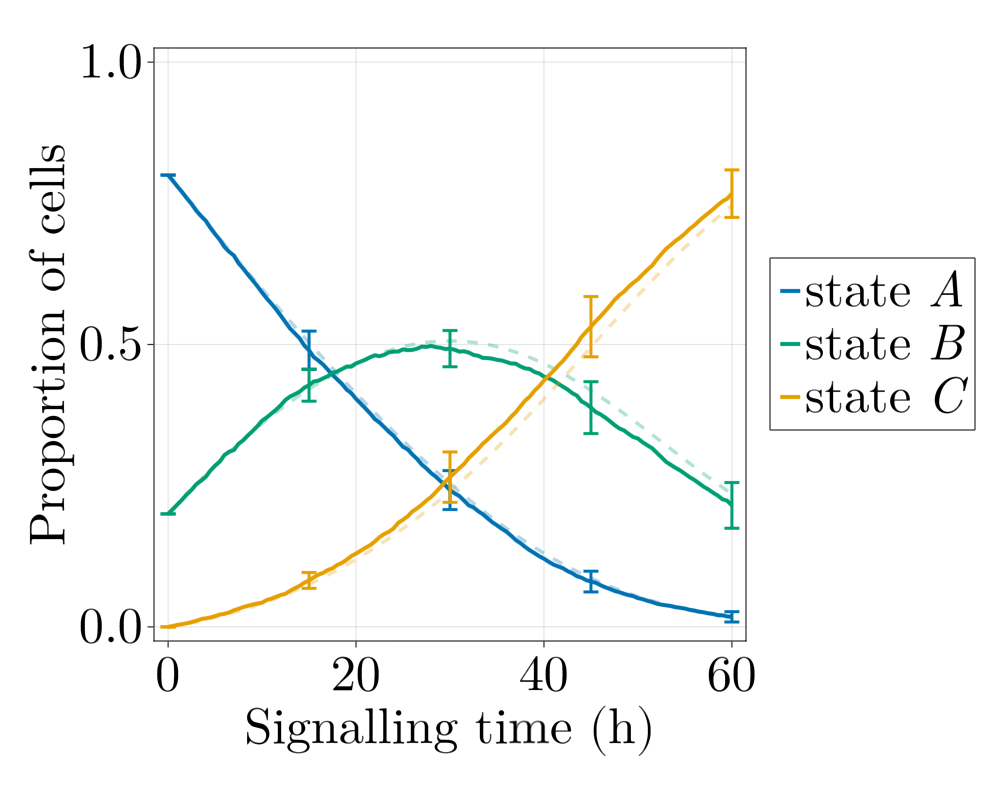

GLMakie.Screen(...)

In [16]:
plot_proportions_vs_meanfield_std(com, color_map, m1, m2, 
    avgprop_cellcell, std=stdprop_cellcell, k=parameters[:k])

## Nonlinear differentiation kinetics: cell-cell signalling (fp = 10)

In [ ]:
com_aux = deepcopy(growncom)
com_aux.k = parameters[:k];
com_aux.range = parameters[:range];

### Loop

In [ ]:
Random.seed!(1234)
seeds = rand(1:2000, ite)
props_cellcell_fp10 = Dict();

In [ ]:
for i in 1:ite
	seed = seeds[i]
	print("Seed $i/$ite = $seed ...")
	Random.seed!(seed)

	com = deepcopy(com_aux)
	initialize_diff!(com)
    global m1 = length(com)
    
	differentiate!(com, save_each, tf)
    println(formed_correctly(com))
	global m2 = length(com)
    
	# plot_aggregate(com, color_map, m1, m2)
	props_cellcell_fp10[i] = get_props(com)
end


### Plot comparison

In [ ]:
dimensionalize_com!(com)

In [ ]:
avgprop_cellcell_fp10 = avg_props_new(com, props_cellcell_fp10, ite);
stdprop_cellcell_fp10 = std_props(com, props_cellcell_fp10, ite);

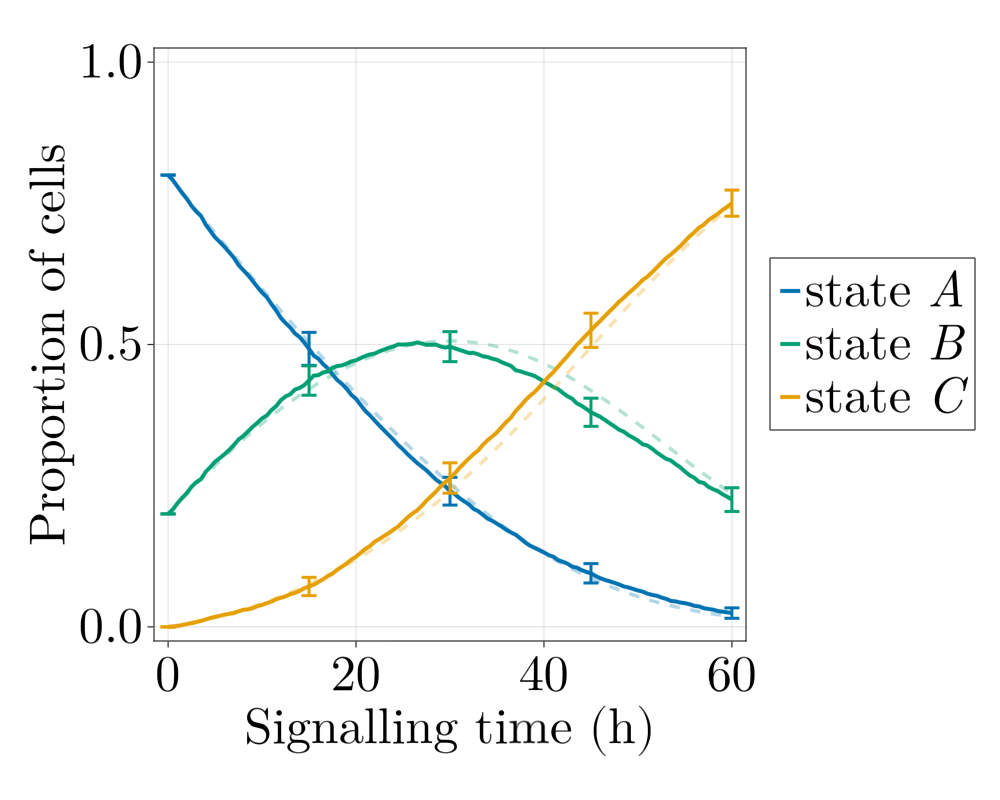

GLMakie.Screen(...)

In [36]:
plot_proportions_vs_meanfield_std(com, color_map, m1, m2, 
    avgprop_cellcell_fp10, std=stdprop_cellcell_fp10, k=parameters[:k])

## Solutions for the first two cases

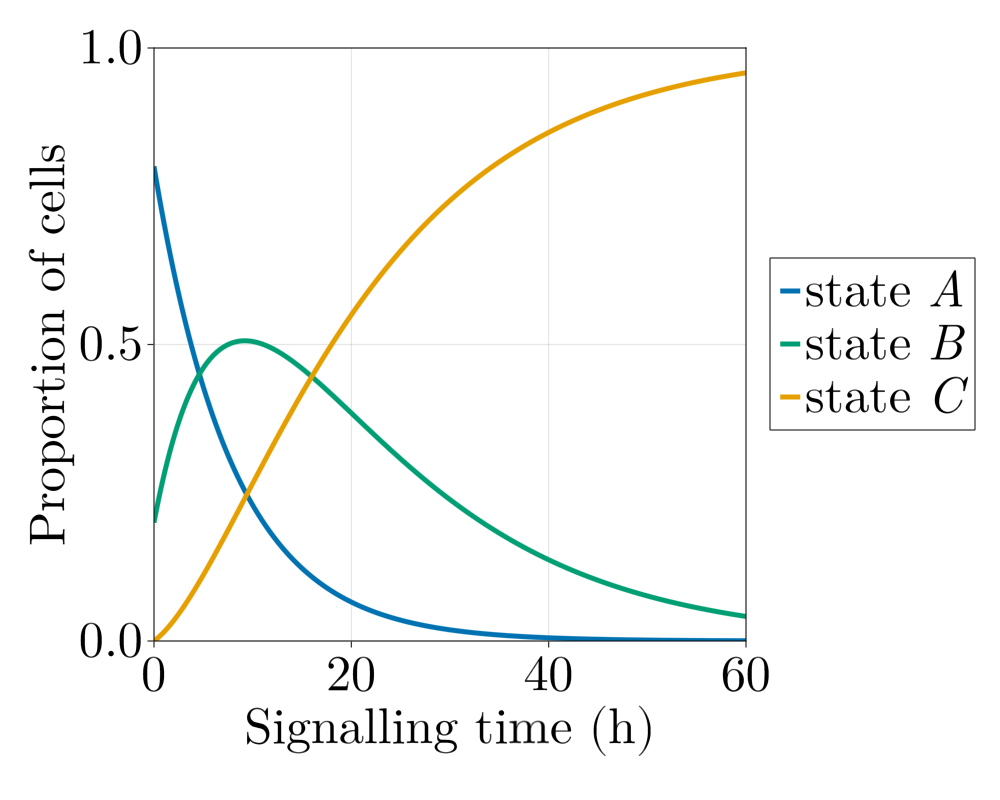

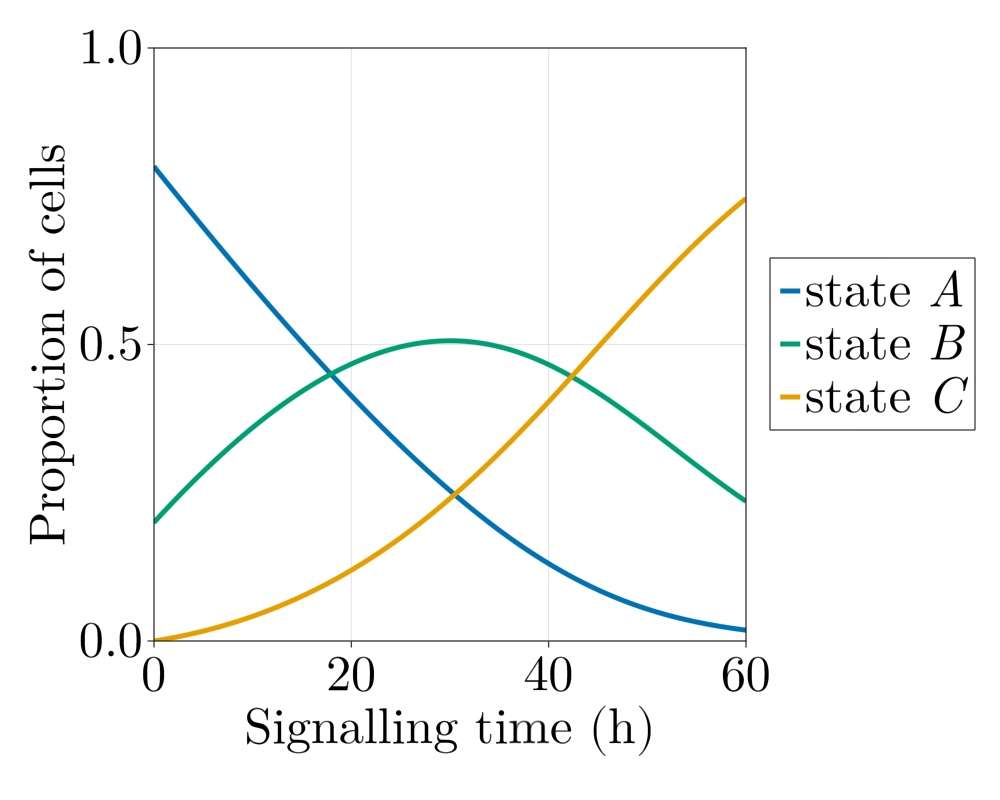

GLMakie.Screen(...)

In [38]:
plot_proportions_analytical(com, color_map, m1, m2)
plot_proportions_numerical_meanfield(com, color_map, m1, m2)
# analytical_vs_meanfield(com, color_map, dimensionalize(com,t=tf))